<a href="https://colab.research.google.com/github/leah0727/class_ai4dl/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"), #1st layer output dimension이 512
    layers.Dense(10, activation="softmax") # 10
]) #파란박스부분

**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop", #"SGD",  #
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 #noramlize
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=100) #6000번
# epoch : 전체 데이터를 학습하는 횟수
# batch size: 데이터를 나눠서 학습하는 데이터의 크기

Epoch 1/5
600/600 [==============================] - 4s 3ms/step - loss: 0.2460 - accuracy: 0.9280
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0987 - accuracy: 0.9702
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0649 - accuracy: 0.9808
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0475 - accuracy: 0.9854
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0345 - accuracy: 0.9896


**Using the model to make predictions**

In [ ]:
predictions.shape

NameError: name 'predictions' is not defined

In [ ]:
test_digits = test_images[0:10] #10개 뽑아 test image에서
predictions = model.predict(test_digits)
predictions[0] #predictions Y'

1/1 [==============================] - 0s 75ms/step


array([6.6487185e-09, 7.0671341e-10, 2.0614921e-06, 5.4319429e-05,
       5.3870515e-12, 1.1192275e-08, 1.3528677e-13, 9.9994326e-01,
       1.3537746e-08, 3.4554768e-07], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.99994326

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0627 - accuracy: 0.9805
test_acc: 0.9804999828338623


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
#0 dimensional tensors

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)

In [ ]:
#1 d tensors

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)

In [ ]:
#2 d tensors

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim #number of axes(Rank)

3

In [ ]:
train_images.shape #shape

(60000, 28, 28)

In [ ]:
train_images.dtype #datatype

dtype('uint8')

**Displaying the fourth digit**

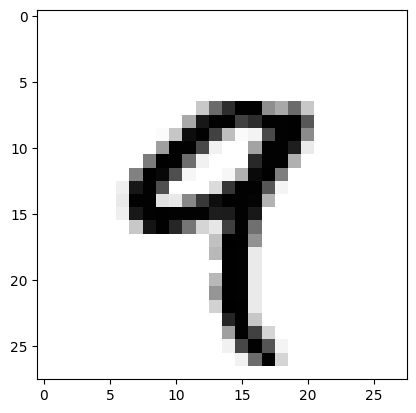

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [ ]:
train_images.shape #60000 이 number of samples

(60000, 28, 28)

In [ ]:
#방법1.
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
#2.
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
#3.
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

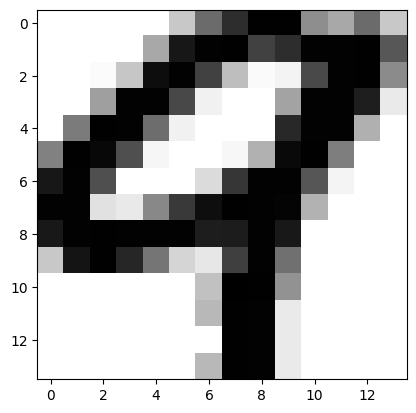

In [ ]:
digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### The notion of data batches

In [ ]:
batch = train_images[:10] #1st batch

In [ ]:
batch = train_images[10:20] #2nd batch

In [ ]:
n = 3
batch = train_images[10 * n:10 * (n + 1)]



---



#3/13 discussion


1. How many samples in Mnisttest dataset?: 10000개
2. What is a dimension for minstdata?
: 3


In [ ]:
#3. Try to create a 3D tensor object. (with any values you like
x = np.array([[[1,2],
               [1,1],
               [1,2],
               [1,1]],
              [[1,2],
               [1,1],
               [1,2],
               [1,1]],
              [[1,2],
               [1,1],
               [1,2],
               [1,1]]])
x.shape


(3, 4, 2)

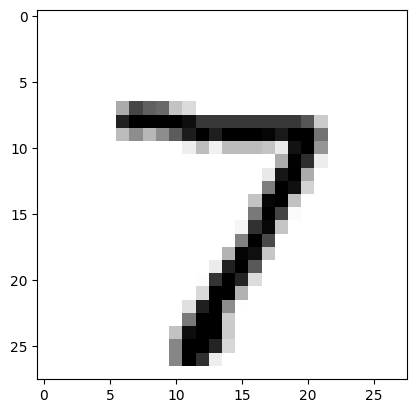

In [ ]:
#4. Try to visualize the 1stdigit from mnisttest dataset (1stdigit data = test_images[0]
import matplotlib.pyplot as plt
digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
test_labels[0]

7

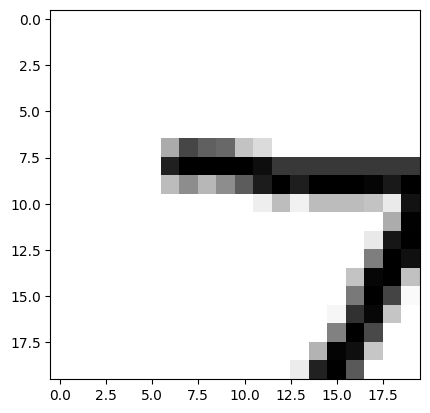

In [ ]:
#5. Try to manipulate and visualize the 1stdigit data

test_images.shape
my_slice = test_images[0]
my_slice.shape

digit = my_slice[:20, :20]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy() #이거 해줘야 함 #overwrite
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
import numpy as np
aa= np.array([1,2,3,-1])

In [ ]:
naive_relu(aa) #len(x.shape) == 2일 때만 됨
#modify 해야함

AssertionError: 

In [ ]:
import numpy as np
aa= np.array([[1,2,3,-1], [1, -1, -1, 0]])

In [ ]:
naive_relu(aa)

array([[1, 2, 3, 0],
       [1, 0, 0, 0]])

In [ ]:
aa

array([[ 1,  2,  3, -1],
       [ 1, -1, -1,  0]])

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
#방법2.
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y #vectorized way * 더 효율적임
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y) #longer time : 14번에 for문 2번 하고 해서 오래걸림
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.62 s


Try to use naïve version of relu and add functions.

-Why we use x.copy() ?
: overwrite

-Why the naïve version of the code slower?
: naive_add에서 for문 2번씩 해서 함 ..

### Broadcasting

In [ ]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([[1,1,1,1,1],[1,1,1,1,1]])

In [ ]:
x.shape

(5,)

In [ ]:
y.shape

(2, 5)

In [ ]:
x+y

array([[2, 3, 4, 5, 6],
       [2, 3, 4, 5, 6]])

In [ ]:
#naive version of broadcasting - skj
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

skip

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x

array([[0., 1.],
       [2., 3.],
       [4., 5.]])

In [ ]:
x.reshape((6, ))

array([0., 1., 2., 3., 4., 5.])

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

-Try to use broadcasting with your own example.


-Explain your broadcasting example to your teammates


-Try reshaping code and explain it to teammates


### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.) #floattype 0.
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
grad_of_y_wrt_x #y = 2 * x + 3 에서 2 가 numpy 2

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [ ]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>



---


#p.4  questions

In [ ]:
x = tf.Variable(2.)
y = tf.Variable(1.)
with tf.GradientTape() as tape:
    z = x*x*y+x*y+3*y
grad_of_z_wrt_xy = tape.gradient(z, [x,y])
grad_of_z_wrt_xy

[<tf.Tensor: shape=(), dtype=float32, numpy=5.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.0>]

In [ ]:
x=tf.constant(np.array([1.,4.,3.]).reshape(1,3),dtype=tf.float32)
W=tf.Variable(tf.random.uniform((3,2)),dtype=tf.float32)
b=tf.Variable(tf.zeros((2,)),dtype=tf.float32)

with tf.GradientTape() as tape:
    z = tf.matmul(x, W) + b
grad_of_z_wrt_Wb = tape.gradient(z, [W, b])
grad_of_z_wrt_Wb

[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[1., 1.],
        [4., 4.],
        [3., 3.]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>]

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([ #이거 쓸때 벡터형태여야해서 reshape 해주는거임
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128) #LOSS minimize

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2679 - accuracy: 0.9230
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1085 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0712 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0509 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0385 - accuracy: 0.9885


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
#naive version
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0


loss at batch 0: 1.54
loss at batch 100: 1.51
loss at batch 200: 1.45
loss at batch 300: 1.37
loss at batch 400: 1.44
Epoch 1
loss at batch 0: 1.28
loss at batch 100: 1.29
loss at batch 200: 1.20
loss at batch 300: 1.17
loss at batch 400: 1.23
Epoch 2
loss at batch 0: 1.09
loss at batch 100: 1.12
loss at batch 200: 1.01
loss at batch 300: 1.02
loss at batch 400: 1.08
Epoch 3
loss at batch 0: 0.95
loss at batch 100: 0.99
loss at batch 200: 0.88
loss at batch 300: 0.90
loss at batch 400: 0.97
Epoch 4
loss at batch 0: 0.85
loss at batch 100: 0.89
loss at batch 200: 0.78
loss at batch 300: 0.82
loss at batch 400: 0.89
Epoch 5
loss at batch 0: 0.78
loss at batch 100: 0.81
loss at batch 200: 0.71
loss at batch 300: 0.75
loss at batch 400: 0.82
Epoch 6
loss at batch 0: 0.72
loss at batch 100: 0.75
loss at batch 200: 0.65
loss at batch 300: 0.70
loss at batch 400: 0.77
Epoch 7
loss at batch 0: 0.67
loss at batch 100: 0.69
loss at batch 200: 0.60
loss at batch 300: 0.66
loss at batch 400: 0.73


### Evaluating the model

In [ ]:
model.weights

[<tf.Variable 'Variable:0' shape=(784, 512) dtype=float32, numpy=
 array([[0.02705206, 0.05675981, 0.02240737, ..., 0.00874676, 0.04324924,
         0.09492456],
        [0.03912382, 0.02747879, 0.01674197, ..., 0.0130811 , 0.08660334,
         0.06888934],
        [0.07740157, 0.0688171 , 0.09627457, ..., 0.00835563, 0.00811548,
         0.08143206],
        ...,
        [0.09215345, 0.09153708, 0.06606682, ..., 0.09255852, 0.03857992,
         0.08823752],
        [0.06061298, 0.02888115, 0.0473976 , ..., 0.02762265, 0.05385839,
         0.08074427],
        [0.0443858 , 0.0973649 , 0.04711007, ..., 0.05682641, 0.02307756,
         0.07285961]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(512,) dtype=float32, numpy=
 array([ 1.37443305e-03, -1.91270106e-03,  9.17878188e-03, -5.65963797e-04,
         4.10154462e-03, -1.04192039e-03,  7.76022905e-03,  7.67250871e-03,
        -8.02503841e-04,  5.84445382e-03, -9.17250582e-04,  2.23916234e-03,
        -3.82818095e-03, -8.57872888e

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.83


## Summary